# Stock Price Prediction

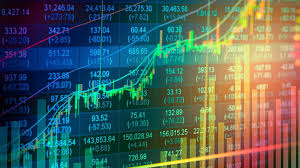

In this notebook, we will learn how to predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [3]:
df.shape

(1692, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


## EDA (Exploratory data analysis)

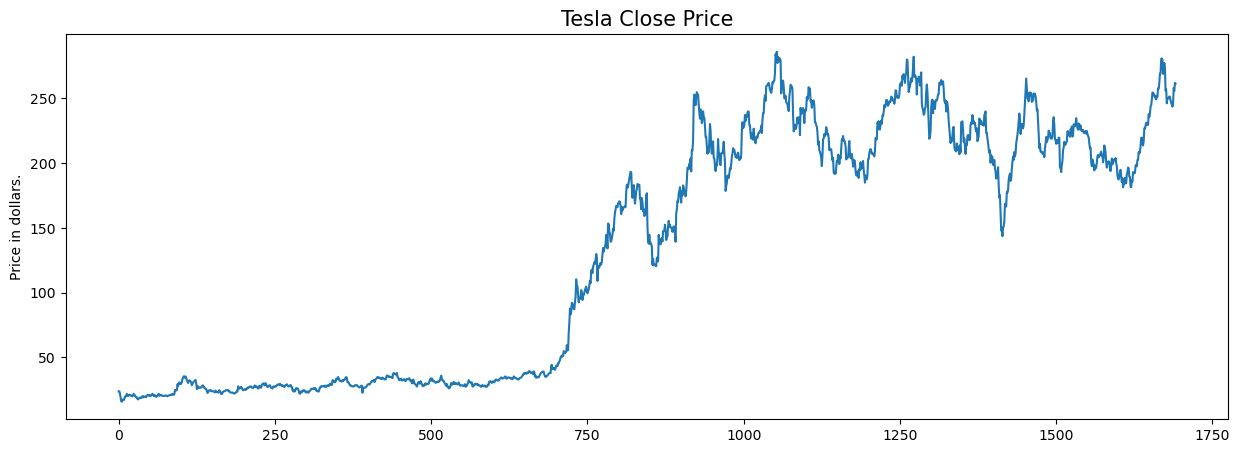

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [8]:
df[df['Close'] == df['Adj Close']].shape
# From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.

(1692, 7)

In [9]:
df = df.drop(['Adj Close'], axis=1)

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [11]:
# check for the null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

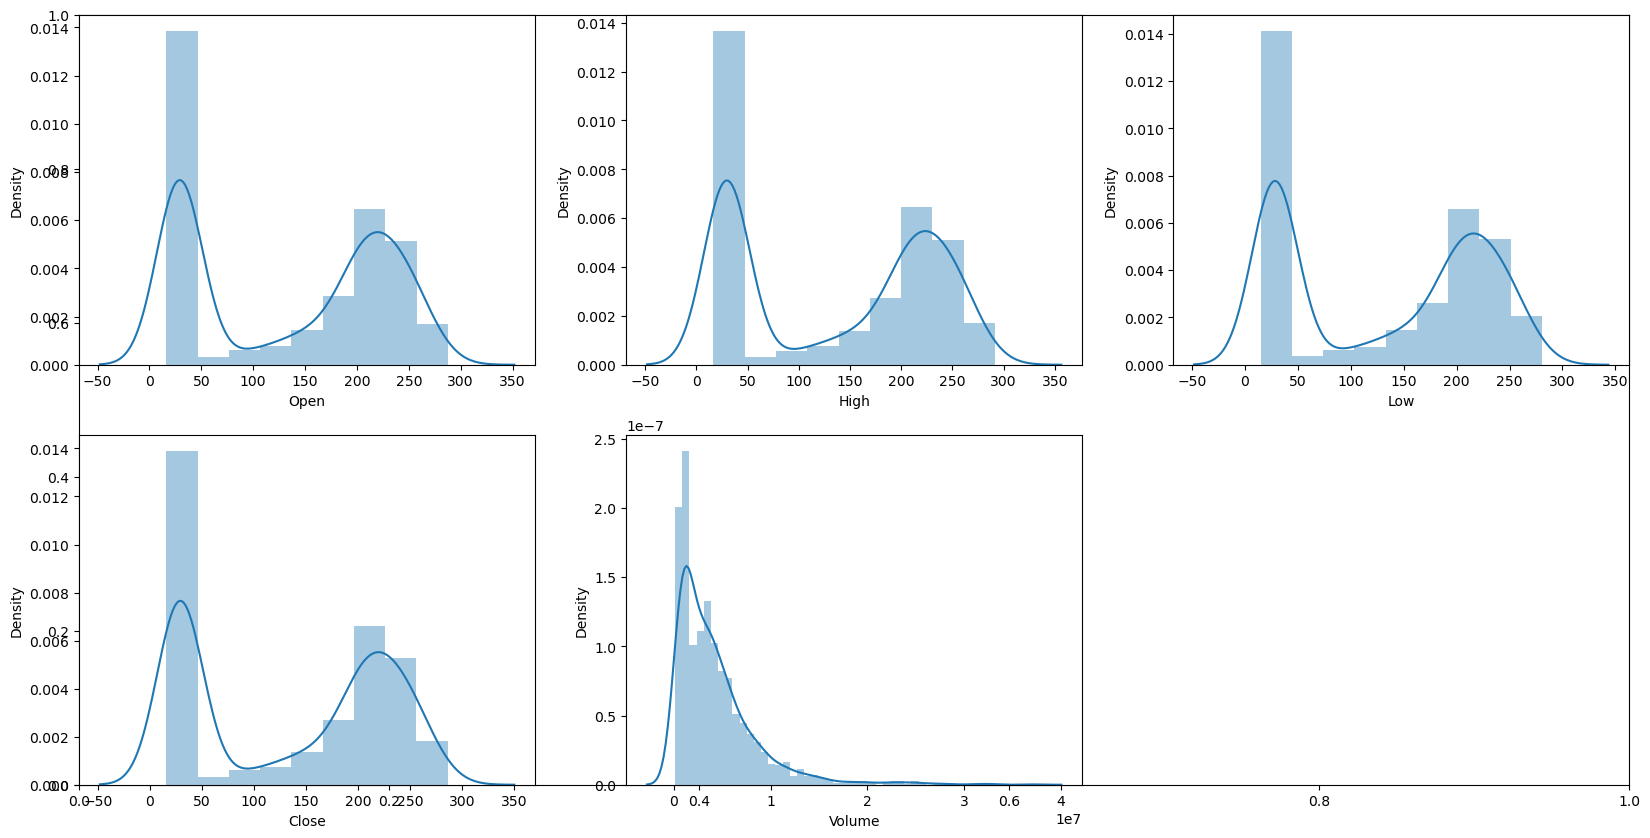

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.
As a description;
1) Two Peaks:
The presence of two peaks in the distribution graph of OHLC data indicates that the data has a bimodal distribution. This means that there are two distinct levels where prices or trading volumes are concentrated, suggesting that trading frequently occurs at these levels.
This situation implies that prices tend to fluctuate around specific regions, or that different trends are observed under certain conditions. For example, one peak might represent higher prices while the other represents lower prices, indicating that market dynamics are variable and trading decisions cluster around different regions.

2) Left-Skewed Volume Data:
The left-skewed nature of the volume data indicates that there is a higher concentration of volume on the left side of the distribution, suggesting that trading activity was more prevalent in a specific period but has since declined over time.
Since volume data reflects market activity, such a skew could signal a reduction in trading activity, a stagnation period, or uncertainty in the market.
These types of analyses play a crucial role in understanding market trends and potential trading opportunities. They can also serve as fundamental technical analysis tools to support your investment decisions.

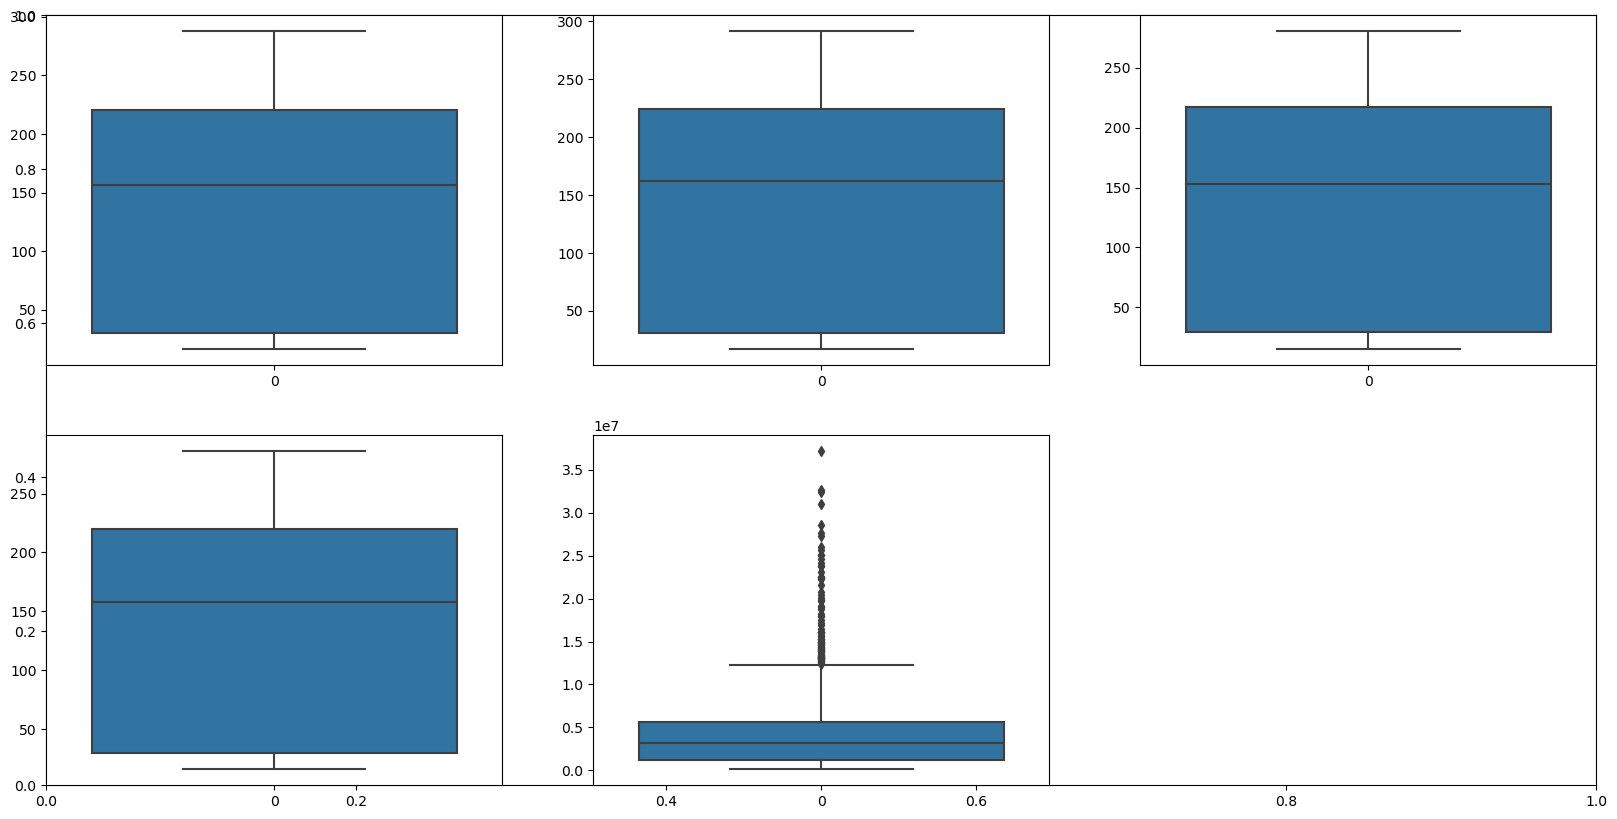

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## Feature Engineering

In [14]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [15]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


A quarter is defined as a quarterly group. Each company prepares its quarterly results and publishes them publicly so that people can analyze the company's performance. 
These quarterly results greatly impact stock prices, which is why I added this feature because it can be a useful feature for the learning model.

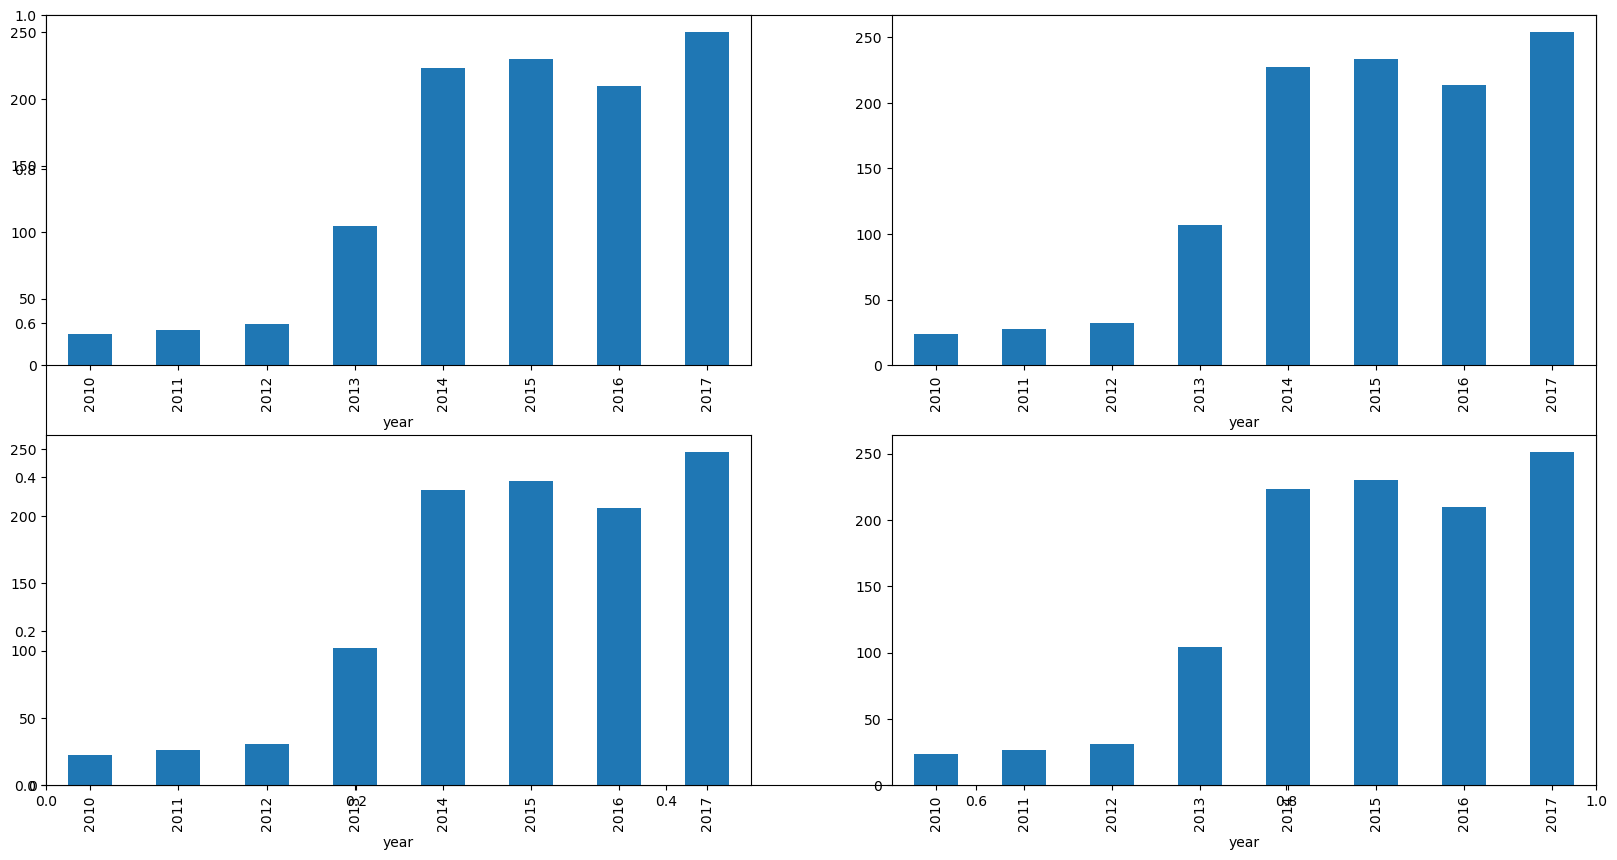

In [16]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

In [17]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


Here are some of the important observations of the grouped data:

1) Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
2) The volume of trades is lower in the months which are quarter end.

In [18]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
# Create a target column to predict if the stock's closing price will rise the next day
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1,0)

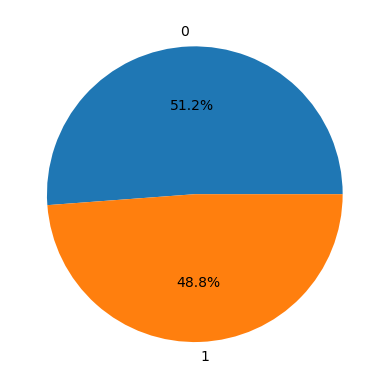

In [19]:
plt.pie(df['target'].value_counts().values,
       labels=[0,1], autopct='%1.1f%%')
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

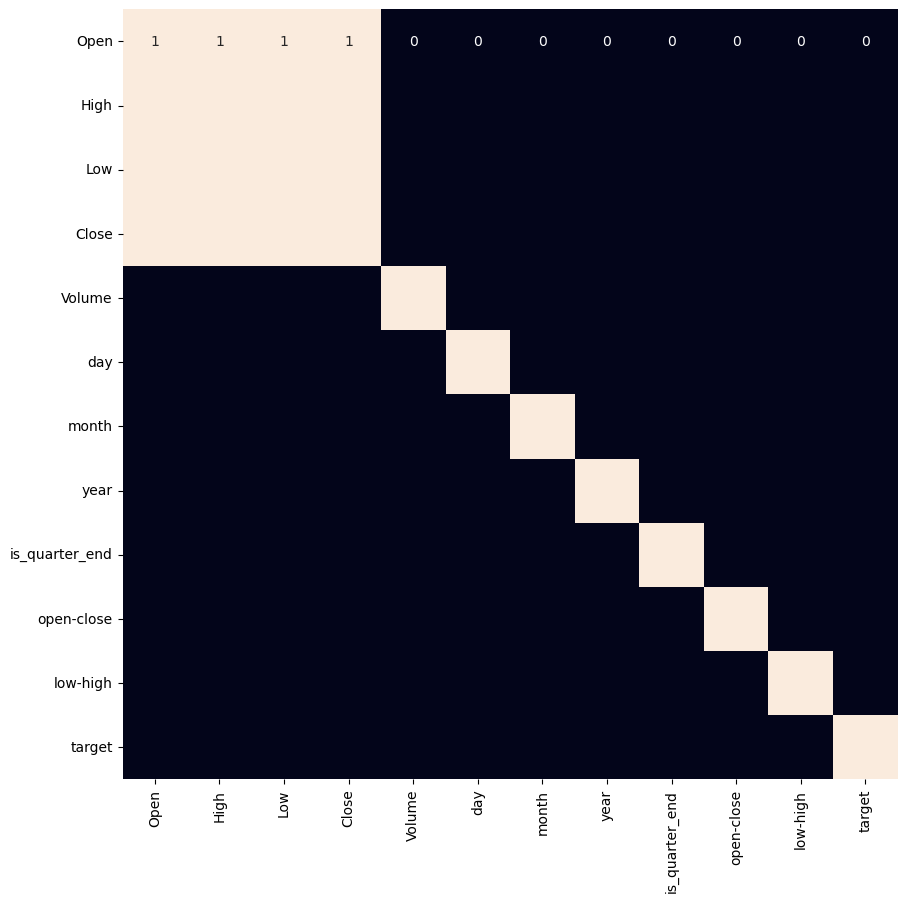

In [20]:
plt.figure(figsize=(10,10))
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

We can clearly say that there is a strong correlation with OHLC data, and the added features are not highly correlated with each other or with the previous features. This means we are ready to build our model

## Data Splitting and Data Normalization

In [21]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, y_train, y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

## Model Development and Evaluation

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Örnek veri seti ve bölme (X_train, X_valid, y_train, y_valid)
# X_train, X_valid, y_train, y_valid = train_test_split(...)

models = [
    LogisticRegression(C=0.1),  # Daha fazla düzenleme
    SVC(kernel='poly', degree=2, C=0.1, probability=True),  # Daha düşük karmaşıklık
    XGBClassifier(reg_lambda=1, reg_alpha=0, eval_metric='auc')  # Düzenleme ve erken durdurma
]

for i in range(3):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
        y_train, models[i].predict_proba(X_train)[:, 1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()

LogisticRegression(C=0.1) : 
Training Accuracy :  0.5191554404145078
Validation Accuracy :  0.5435330347144457

SVC(C=0.1, degree=2, kernel='poly', probability=True) : 
Training Accuracy :  0.47844905008635574
Validation Accuracy :  0.45884658454647254

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_stat

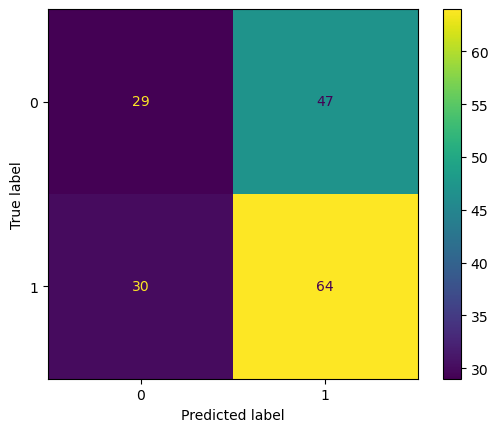

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, y_valid)
plt.show()